In [ ]:
!git clone https://github.com/MSR7878/es335-25-fall-assignment-1.git
%cd es335-25-fall-assignment-1


Cloning into 'es335-25-fall-assignment-1'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 36 (delta 5), reused 4 (delta 4), pack-reused 28 (from 2)
Receiving objects: 100% (36/36), 22.29 KiB | 4.46 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/es335-25-fall-assignment-1


In [ ]:
pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import tsfel  # for feature extraction


In [ ]:
%cd /content/es335-25-fall-assignment-1


/content/es335-25-fall-assignment-1


In [ ]:
!ls /content/es335-25-fall-assignment-1


auto-efficiency.py     experiments.py  metrics.py  tree
classification-exp.py  HAR	       README.md   usage.py


In [ ]:
!ls /content/es335-25-fall-assignment-1/HAR


CombineScript.py  MakeDataset.py


In [ ]:
!wget https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip -O UCI-HAR-Dataset.zip
!unzip -q UCI-HAR-Dataset.zip -d /content/es335-25-fall-assignment-1/HAR


--2025-08-27 17:29:13--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI-HAR-Dataset.zip’

UCI-HAR-Dataset.zip     [      <=>           ]  58.18M  7.68MB/s    in 23s     

2025-08-27 17:29:37 (2.51 MB/s) - ‘UCI-HAR-Dataset.zip’ saved [61005872]



In [ ]:
!ls /content/es335-25-fall-assignment-1/HAR/


 CombineScript.py  'UCI HAR Dataset.names'
 MakeDataset.py    'UCI HAR Dataset.zip'


In [ ]:
!unzip "/content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset.zip" -d "/content/es335-25-fall-assignment-1/HAR/"


Archive:  /content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset.zip
   creating: /content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset/
  inflating: /content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset/.DS_Store  
   creating: /content/es335-25-fall-assignment-1/HAR/__MACOSX/
   creating: /content/es335-25-fall-assignment-1/HAR/__MACOSX/UCI HAR Dataset/
  inflating: /content/es335-25-fall-assignment-1/HAR/__MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: /content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset/activity_labels.txt  
  inflating: /content/es335-25-fall-assignment-1/HAR/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: /content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset/features.txt  
  inflating: /content/es335-25-fall-assignment-1/HAR/__MACOSX/UCI HAR Dataset/._features.txt  
  inflating: /content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset/features_info.txt  
  inflating: /content/es335-25-fall-assignment-1/HAR/__MACOSX/UCI HAR Dataset/._feat

In [ ]:
!ls /content/es335-25-fall-assignment-1/HAR/


 CombineScript.py   MakeDataset.py    'UCI HAR Dataset.names'
 __MACOSX	   'UCI HAR Dataset'  'UCI HAR Dataset.zip'


In [ ]:
!ls "/content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset/train"


'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [ ]:
import os

base_path = "/content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset/train/Inertial Signals"
print("Files in train/Inertial Signals:\n", os.listdir(base_path))


Files in train/Inertial Signals:
 ['body_acc_x_train.txt', 'total_acc_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_x_train.txt', 'total_acc_z_train.txt', 'body_acc_y_train.txt', 'body_gyro_z_train.txt', 'body_acc_z_train.txt', 'total_acc_y_train.txt']


In [ ]:
%cd /content/es335-25-fall-assignment-1/HAR
!python3 CombineScript.py


/content/es335-25-fall-assignment-1/HAR
/content/es335-25-fall-assignment-1/HAR/CombineScript.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
/content/es335-25-fall-assignment-1/HAR/CombineScript.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
/content/es335-25-fall-assignment-1/HAR/CombineScript.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train

In [ ]:
%cd /content/es335-25-fall-assignment-1/HAR
!python3 MakeDataset.py


/content/es335-25-fall-assignment-1/HAR
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [ ]:
os.listdir("/content/es335-25-fall-assignment-1/HAR")

['Combined',
 'MakeDataset.py',
 'CombineScript.py',
 'UCI HAR Dataset.zip',
 '__MACOSX',
 'UCI HAR Dataset.names',
 'UCI HAR Dataset']

In [ ]:
%cd /content/es335-25-fall-assignment-1/HAR
!python3 MakeDataset.py


/content/es335-25-fall-assignment-1/HAR
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [ ]:
dataset_path = "/content/es335-25-fall-assignment-1/HAR/Dataset/train"


In [ ]:
activity_labels = {
    0: "Laying",
    1: "Sitting",
    2: "Standing",
    3: "Walking",
    4: "Walking Upstairs",
    5: "Walking Downstairs"
}

In [ ]:
combined_path = "/content/es335-25-fall-assignment-1/HAR/Combined"
print("Combined exists:", os.path.exists(combined_path))

if os.path.isdir(combined_path):
    items = os.listdir(combined_path)
    print("Items inside Combined:", items[:20])


Combined exists: True
Items inside Combined: ['Train', 'Test']


In [ ]:
train_path = "/content/es335-25-fall-assignment-1/HAR/Combined/Train"
print("Train exists:", os.path.exists(train_path))

if os.path.isdir(train_path):
    items = os.listdir(train_path)
    print("Items inside Train:", items[:20])


Train exists: True
Items inside Train: ['STANDING', 'WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING']


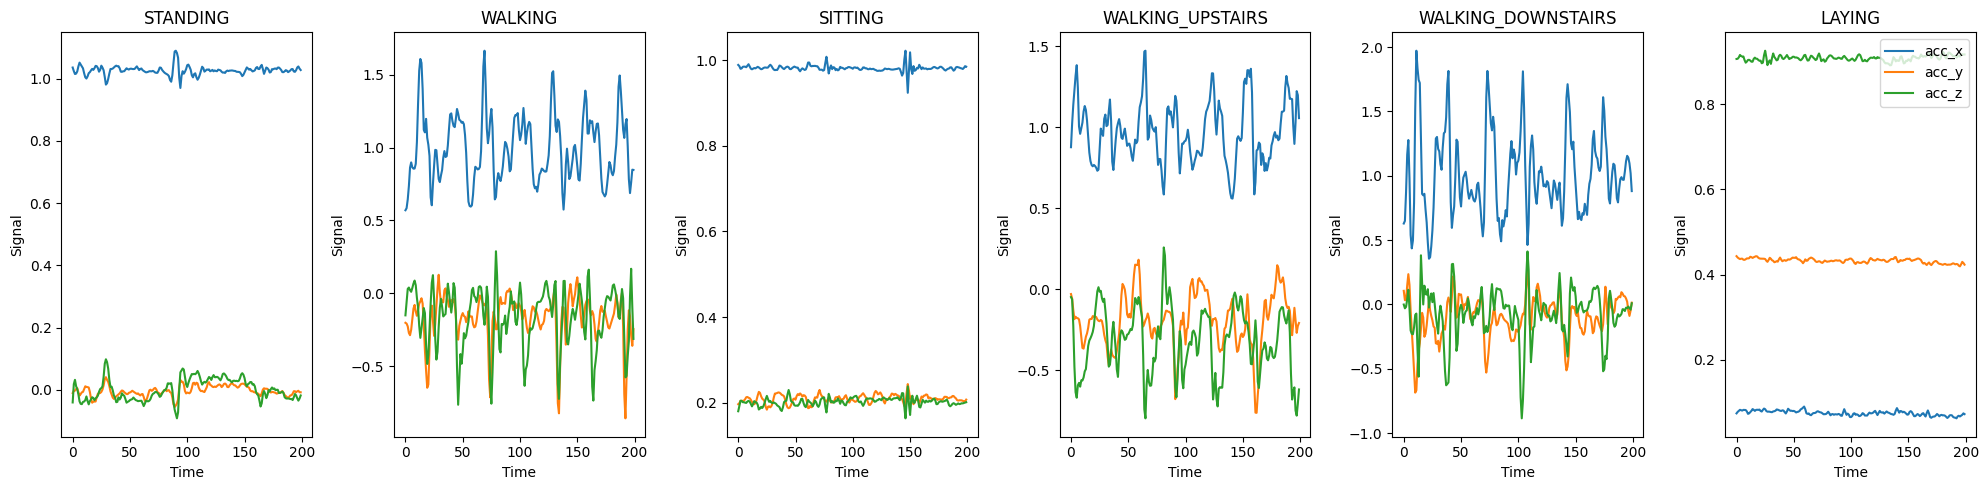

In [ ]:
#Answer1 HAR TASK 1

activities = os.listdir(train_path)

plt.figure(figsize=(20, 5))

for i, activity in enumerate(activities):
    # Pick the first file inside each activity folder
    file_path = os.path.join(train_path, activity, os.listdir(os.path.join(train_path, activity))[0])
    df = pd.read_csv(file_path)

    # Plot only first 200 timesteps for readability
    plt.subplot(1, 6, i+1)
    plt.plot(df.iloc[:200, 0], label="acc_x")
    plt.plot(df.iloc[:200, 1], label="acc_y")
    plt.plot(df.iloc[:200, 2], label="acc_z")
    plt.title(activity)
    plt.xlabel("Time")
    plt.ylabel("Signal")

plt.tight_layout()
plt.legend()
plt.show()


The waveform plots reveal both differences and similarities between activity classes. Dynamic activities such as walking, walking _upstairs and downstairs exhibit clear varations, while static activities like sitting ,standing, sleeping show nearly flat signals. Some pairs of activities (e.g., walking vs upstairs, sitting vs standing) look similar, which may make them harder to classify.

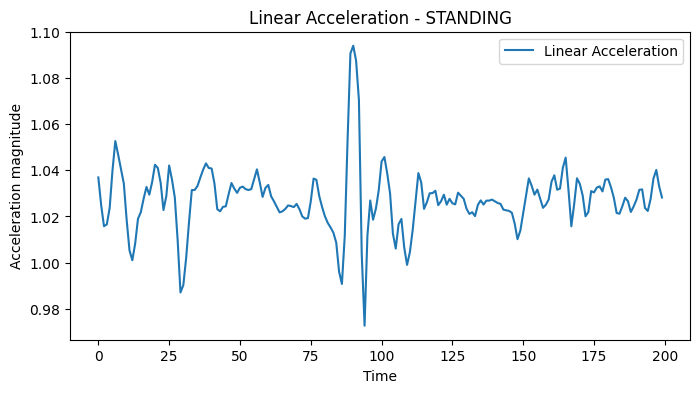

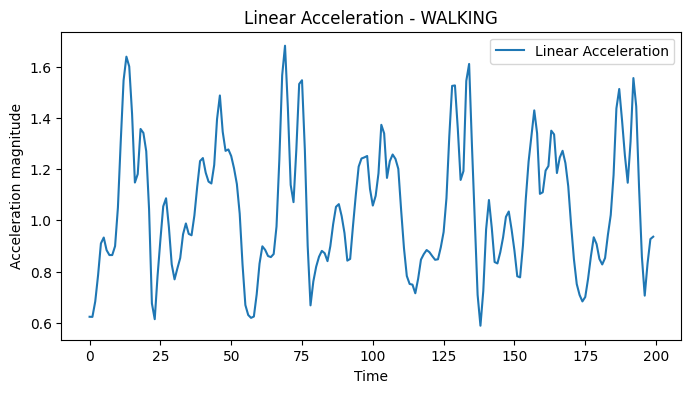

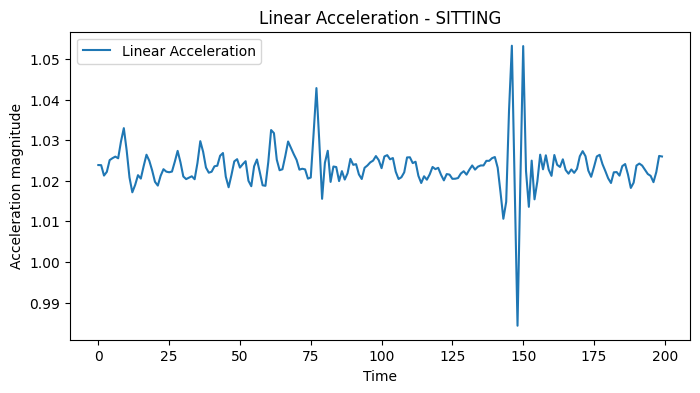

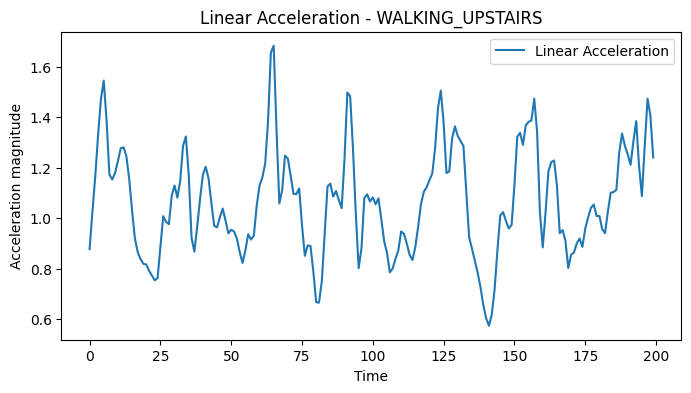

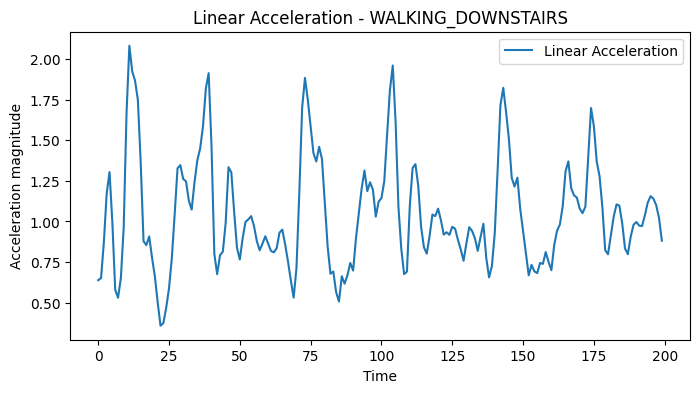

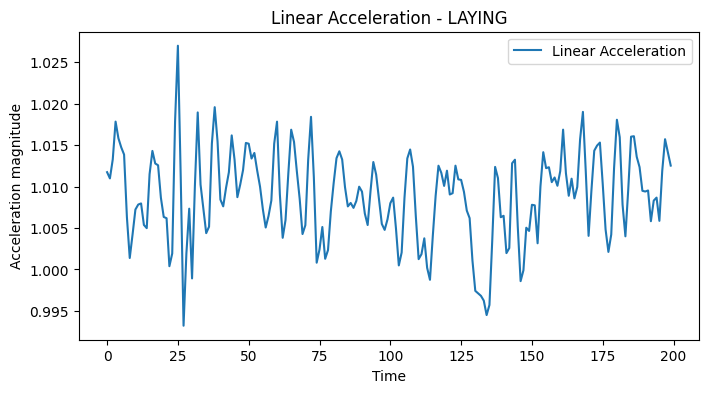

In [ ]:
#for answer of Q2 in task 1 of HAR
for activity in activities:
    # Take the first file from each activity folder
    file_path = os.path.join(train_path, activity, os.listdir(os.path.join(train_path, activity))[0])
    df = pd.read_csv(file_path)

    # Compute linear acceleration magnitude
    acc = np.sqrt(df.iloc[:,0]**2 + df.iloc[:,1]**2 + df.iloc[:,2]**2)

    # Plot first 200 timesteps ( here timestep is 1/50 second as the giventhe sampling rate is 50Hz)
    plt.figure(figsize=(8,4))
    plt.plot(acc.iloc[:200], label="Linear Acceleration")
    plt.title(f"Linear Acceleration - {activity}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration magnitude")
    plt.legend()
    plt.show()


Answer 2 _ HAR _ Task1.
By observing the linear acceleration magnitude, static activities produce nearly flat signals while dynamic activities show strong varations. This difference is clear enough that even a simple difference method could separate static vs dynamic activities without a complex ML model. However, to classify individual activities within each group, a machine learning model is necessary.

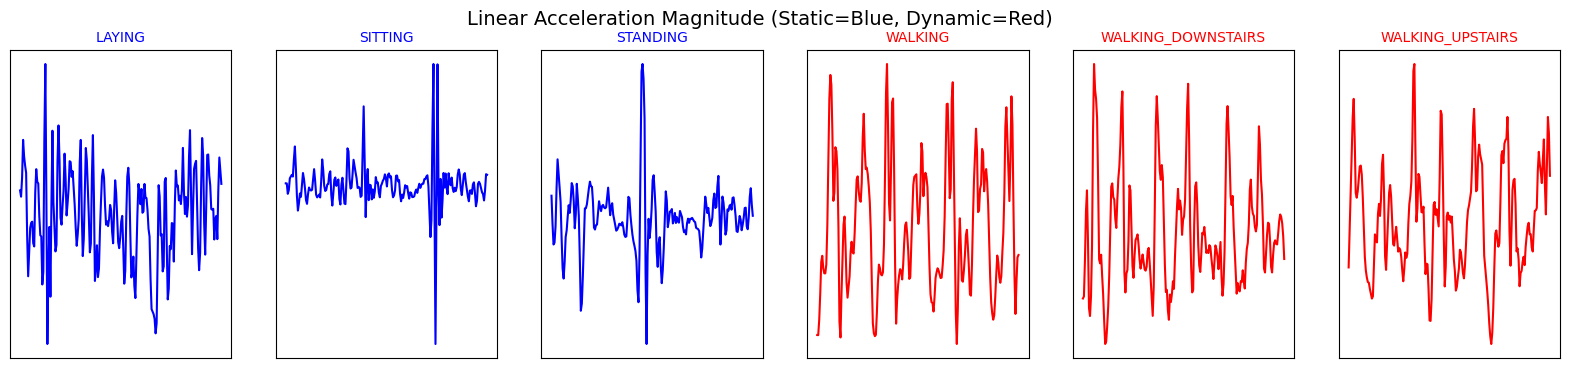

In [ ]:
#Justifictation  of the Q2 of task 1
# Define color map
static = ["LAYING", "SITTING", "STANDING"]
colors = {"LAYING":"blue", "SITTING":"blue", "STANDING":"blue",
          "WALKING":"red", "WALKING_UPSTAIRS":"red", "WALKING_DOWNSTAIRS":"red"}

plt.figure(figsize=(20, 4))

for i, activity in enumerate(sorted(activities)):  # keep consistent order
    file_path = os.path.join(train_path, activity, os.listdir(os.path.join(train_path, activity))[0])
    df = pd.read_csv(file_path)

    # Linear acceleration magnitude
    acc = np.sqrt(df.iloc[:,0]**2 + df.iloc[:,1]**2 + df.iloc[:,2]**2)

    # Plot
    plt.subplot(1, len(activities), i+1)
    plt.plot(acc.iloc[:200], color=colors[activity])
    plt.title(activity, fontsize=10, color=colors[activity])
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Linear Acceleration Magnitude (Static=Blue, Dynamic=Red)", fontsize=14)
plt.show()


This shows that how we can differentiate the activites without using ML

Shape of X before PCA: (126, 3)


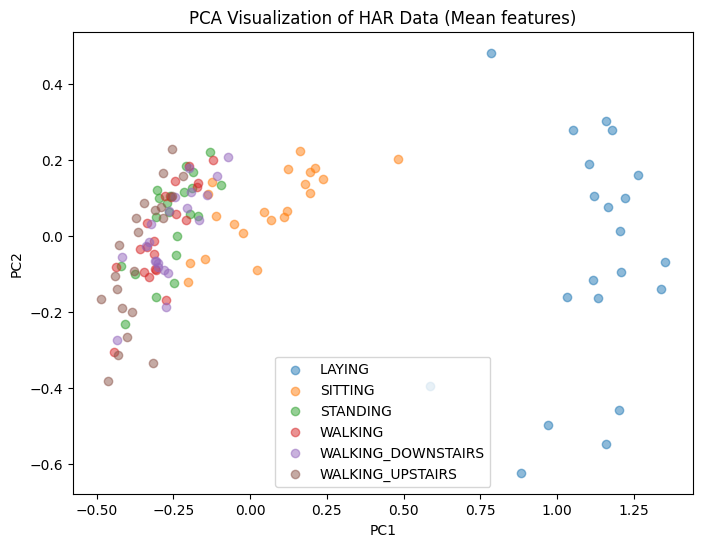

In [ ]:
#Q3_task1_HAR
from sklearn.decomposition import PCA

X = []
y = []

# Read data: summarize each timeseries with mean per axis
for activity in activities:
    activity_path = os.path.join(train_path, activity)
    files = os.listdir(activity_path)

    for file in files:
        df = pd.read_csv(os.path.join(activity_path, file))

        # Instead of flattening, take mean per column (x,y,z)
        features = df.mean(axis=0).values
        X.append(features)
        y.append(activity)

X = np.array(X)
y = np.array(y)

print("Shape of X before PCA:", X.shape)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
for activity in activities:
    idx = (y == activity)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=activity, alpha=0.5)

plt.legend()
plt.title("PCA Visualization of HAR Data (Mean features)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Q3_task1_HAR(using PCA)

The upper plot describes the scatter plot to visualize different class of activity and PCA converts the 3d axes into 2d as mean(x, y, z) to PC1 and PC2.

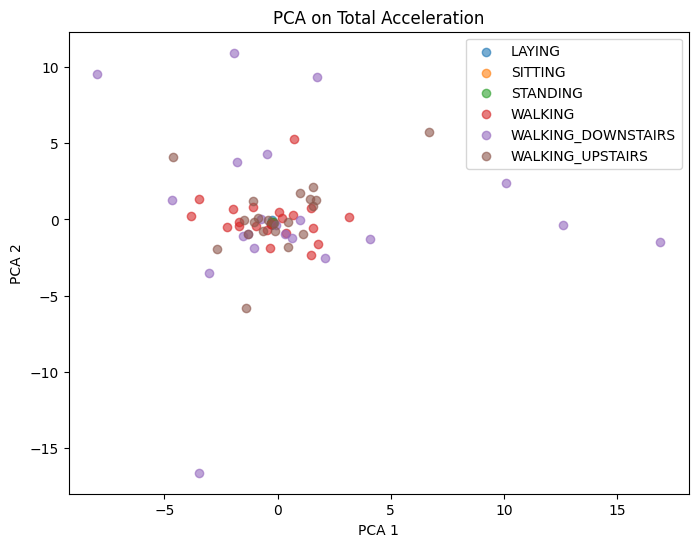

In [ ]:
base_path = "/content/es335-25-fall-assignment-1/HAR/Combined/Train"

X = []
y = []

for activity in os.listdir(base_path):
    act_path = os.path.join(base_path, activity)
    files = os.listdir(act_path)

    for file in files[:40]:  # limit to 40 per class
        df = pd.read_csv(os.path.join(act_path, file))
        acc_x = df.iloc[:,0].values
        acc_y = df.iloc[:,1].values
        acc_z = df.iloc[:,2].values

        acc_total = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        X.append(acc_total)
        y.append(activity)

#  Fix: truncate/pad sequences to same length
min_len = min(len(seq) for seq in X)  # choose shortest length
X_fixed = np.array([seq[:min_len] for seq in X])  # cut all to min_len

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_fixed)

# Plot
plt.figure(figsize=(8,6))
for activity in np.unique(y):
    idx = np.array(y) == activity
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, alpha=0.6)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA on Total Acceleration")
plt.legend()
plt.show()


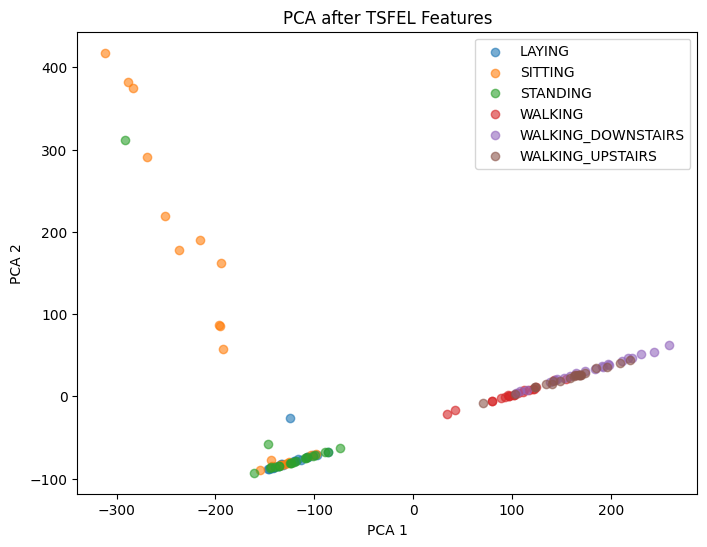

In [ ]:
import tsfel

# Define a feature extraction configuration (time domain for simplicity)
cfg = tsfel.get_features_by_domain("temporal")

X_feats = []
for seq in X_fixed:
    df_feats = tsfel.time_series_features_extractor(cfg, seq, fs=50, verbose=0)
    X_feats.append(df_feats.values.flatten())

X_feats = np.array(X_feats)

# PCA
pca = PCA(n_components=2)
X_tsfel_pca = pca.fit_transform(X_feats)

plt.figure(figsize=(8,6))
for activity in np.unique(y):
    idx = np.array(y) == activity
    plt.scatter(X_tsfel_pca[idx, 0], X_tsfel_pca[idx, 1], label=activity, alpha=0.6)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA after TSFEL Features")
plt.legend()
plt.show()


/tmp/ipython-input-2572433152.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_file, delim_whitespace=True, header=None)
/tmp/ipython-input-2572433152.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(y_train_file, delim_whitespace=True, header=None).values.ravel()


Shape of X_train: (7352, 561)
Shape of y_train: (7352,)


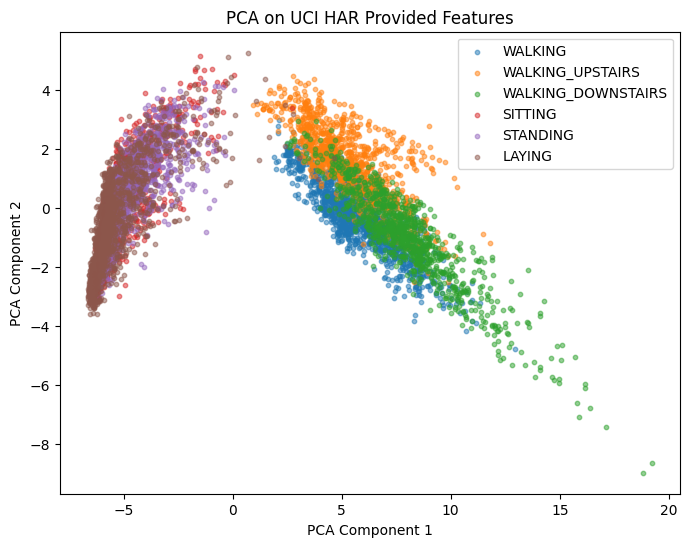

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paths to provided dataset features
uci_path = "/content/es335-25-fall-assignment-1/HAR/UCI HAR Dataset"
X_train_file = os.path.join(uci_path, "train", "X_train.txt")
y_train_file = os.path.join(uci_path, "train", "y_train.txt")

# Load data
X_train = pd.read_csv(X_train_file, delim_whitespace=True, header=None)
y_train = pd.read_csv(y_train_file, delim_whitespace=True, header=None).values.ravel()

print("Shape of X_train:", X_train.shape)  # should be (7352, 561)
print("Shape of y_train:", y_train.shape)  # should be (7352,)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Activity labels (from dataset docs)
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

# Plot
plt.figure(figsize=(8,6))
for act_id, act_name in activity_labels.items():
    mask = y_train == act_id
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=act_name, alpha=0.5, s=10)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA on UCI HAR Provided Features")
plt.legend()
plt.show()


In [ ]:
import os

train_path = "/content/es335-25-fall-assignment-1/HAR/Combined/Train"

print("Activities in Train:", os.listdir(train_path))

for activity in os.listdir(train_path):
    activity_path = os.path.join(train_path, activity)
    print(f"\nFiles inside {activity}:")
    print(os.listdir(activity_path)[:5])  # show first 5 files
    break  # remove this 'break' after first check


Activities in Train: ['STANDING', 'WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING']

Files inside STANDING:
['Subject_23.csv', 'Subject_27.csv', 'Subject_15.csv', 'Subject_3.csv', 'Subject_7.csv']


In [ ]:
import pandas as pd
import os

activity = "STANDING"
activity_path = f"/content/es335-25-fall-assignment-1/HAR/Combined/Train/{activity}"

# Load one subject file
df = pd.read_csv(os.path.join(activity_path, "Subject_23.csv"))
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())


Shape: (4352, 3)
Columns: Index(['accx', 'accy', 'accz'], dtype='object')
       accx      accy      accz
0  1.036088 -0.009908 -0.040132
1  1.024671 -0.002616  0.018781
2  1.015224 -0.002183  0.032526
3  1.016490  0.002975  0.011839
4  1.023659  0.005793  0.002568


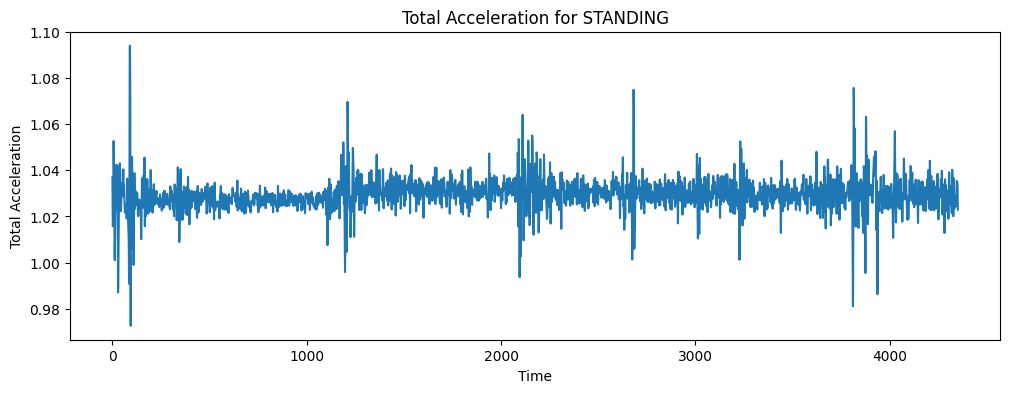

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute total acceleration
total_acc = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)

# Plot total acceleration for this subject
plt.figure(figsize=(12,4))
plt.plot(total_acc)
plt.title(f"Total Acceleration for {activity}")
plt.xlabel("Time")
plt.ylabel("Total Acceleration")
plt.show()


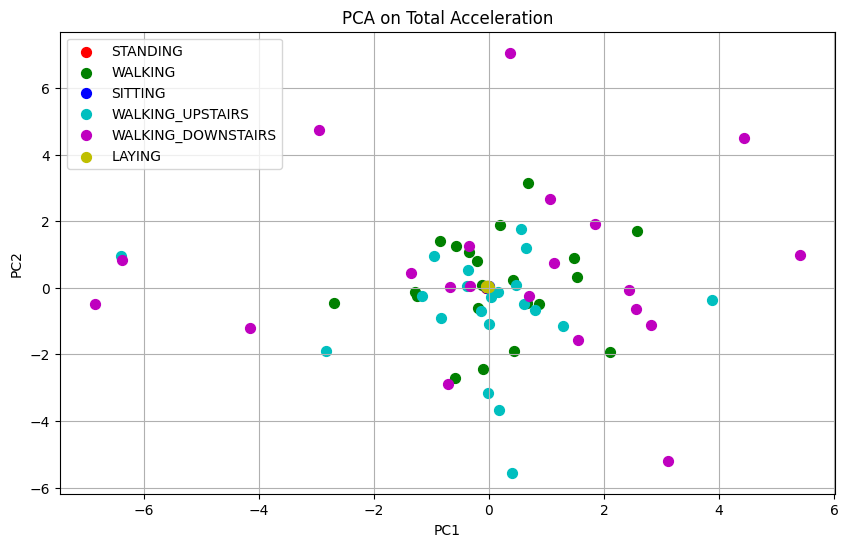

In [ ]:
from sklearn.decomposition import PCA
import os
import pandas as pd

# Paths
combined_train_path = "/content/es335-25-fall-assignment-1/HAR/Combined/Train"

# Activities
ACTIVITIES = ['STANDING', 'WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING']

X_total_acc = []
y_total_acc = []

# Loop through activities and subjects
for label, activity in enumerate(ACTIVITIES):
    activity_folder = os.path.join(combined_train_path, activity)
    for file in os.listdir(activity_folder):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(activity_folder, file))
            # Compute total acceleration
            total_acc = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)
            # Downsample or truncate/pad to first 500 samples for uniformity
            total_acc = total_acc[:500].values
            X_total_acc.append(total_acc)
            y_total_acc.append(label)

# Convert to array
X_total_acc = np.array(X_total_acc)
y_total_acc = np.array(y_total_acc)

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_total_acc)

# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = ['r','g','b','c','m','y']
for label, color in zip(range(6), colors):
    plt.scatter(X_pca[y_total_acc==label,0], X_pca[y_total_acc==label,1], c=color, label=ACTIVITIES[label], s=50)
plt.title("PCA on Total Acceleration")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tsfel

# Load TSFEL default feature configuration
cfg = tsfel.get_features_by_domain()

print("TSFEL configuration loaded.")


TSFEL configuration loaded.


In [ ]:
import pandas as pd
import numpy as np
from tsfel.feature_extraction.calc_features import time_series_features_extractor
import os

# Path to training data
train_path = "/content/es335-25-fall-assignment-1/HAR/Combined/Train"

# Pick one activity and one subject
activity = "STANDING"
subject_file = os.listdir(os.path.join(train_path, activity))[0]  # first CSV
file_path = os.path.join(train_path, activity, subject_file)

# Load CSV
df = pd.read_csv(file_path)
print("Data shape:", df.shape)
print(df.head())

# Extract TSFEL features
features = time_series_features_extractor(cfg, df[['accx', 'accy', 'accz']].to_numpy(), fs=50)

# Clean features
features = features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

print("TSFEL features shape for one subject:", features.shape)


Data shape: (4352, 3)
       accx      accy      accz
0  1.036088 -0.009908 -0.040132
1  1.024671 -0.002616  0.018781
2  1.015224 -0.002183  0.032526
3  1.016490  0.002975  0.011839
4  1.023659  0.005793  0.002568


TSFEL features shape for one subject: (1, 468)


In [ ]:
tsfel_features_list = []
tsfel_labels_list = []

# Loop through all activities
for label, activity in enumerate(['STANDING', 'WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING']):
    activity_folder = os.path.join(train_path, activity)
    for subject_file in os.listdir(activity_folder):
        file_path = os.path.join(activity_folder, subject_file)
        df = pd.read_csv(file_path)

        # Extract TSFEL features
        feats = time_series_features_extractor(cfg, df[['accx', 'accy', 'accz']].to_numpy(), fs=50)
        feats = feats.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

        if not feats.empty:
            tsfel_features_list.append(feats.iloc[0].values)  # 1 row per file
            tsfel_labels_list.append(label)

# Convert to numpy arrays
X_tsfel = np.array(tsfel_features_list)
y_tsfel = np.array(tsfel_labels_list)

print("TSFEL features shape:", X_tsfel.shape)
print("Labels shape:", y_tsfel.shape)


TSFEL features shape: (126, 468)
Labels shape: (126,)


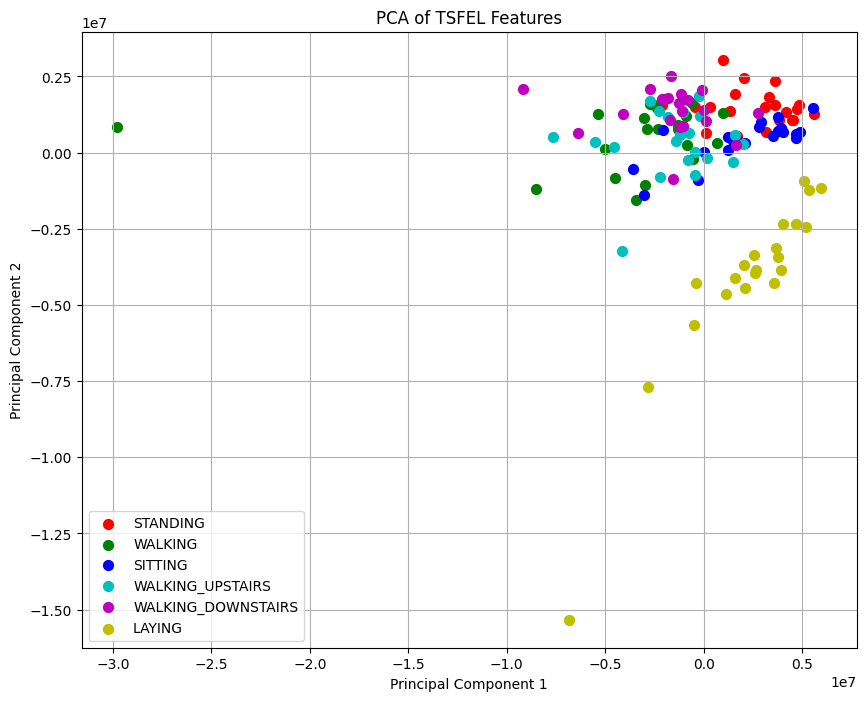

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tsfel)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y_tsfel

# Plot scatter
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y']
activities = ['STANDING', 'WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING']

for label, color in enumerate(colors):
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=activities[label], c=color, s=50)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of TSFEL Features")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X_dataset = []
y_dataset = []

max_len = 500  # first 500 samples = 10 seconds

for label, activity_name in ACTIVITIES.items():
    activity_folder = os.path.join(combined_train_path, activity_name)
    if os.path.exists(activity_folder):
        for file_name in os.listdir(activity_folder):
            if file_name.endswith(".csv"):
                df = pd.read_csv(os.path.join(activity_folder, file_name))
                # truncate or pad to max_len
                df_trunc = df[['accx', 'accy', 'accz']].values[:max_len]
                if df_trunc.shape[0] < max_len:
                    # pad with zeros if less than max_len
                    pad = np.zeros((max_len - df_trunc.shape[0], 3))
                    df_trunc = np.vstack([df_trunc, pad])
                X_dataset.append(df_trunc.flatten())  # flatten to 1D
                y_dataset.append(label)

# Convert to numpy arrays
X_dataset = np.array(X_dataset)
y_dataset = np.array(y_dataset)

print("Dataset features shape:", X_dataset.shape)
print("Labels shape:", y_dataset.shape)


Dataset features shape: (126, 1500)
Labels shape: (126,)


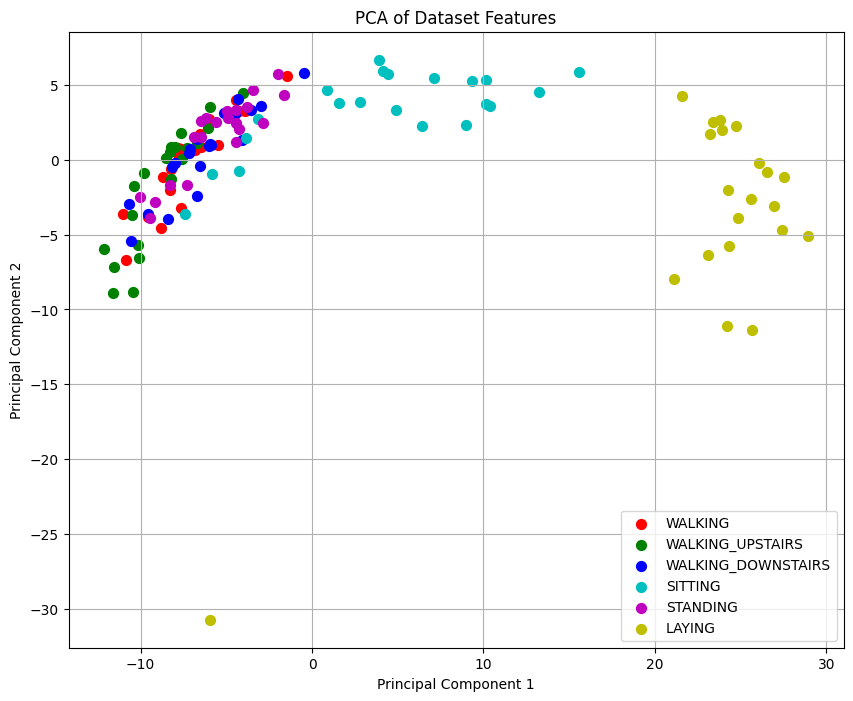

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca_dataset = PCA(n_components=2)
X_pca_dataset = pca_dataset.fit_transform(X_dataset)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca_dataset, columns=['PC1', 'PC2'])
pca_df['label'] = y_dataset

# Scatter plot
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for label, color in zip(range(6), colors):
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], c=color, label=ACTIVITIES[label], s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset Features')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import tsfel
from tsfel.feature_extraction.calc_features import time_series_features_extractor

# Define activities
ACTIVITIES = {0: "WALKING", 1: "WALKING_UPSTAIRS", 2: "WALKING_DOWNSTAIRS",
              3: "SITTING", 4: "STANDING", 5: "LAYING"}

# TSFEL configuration
cfg = tsfel.get_features_by_domain()

# Paths
combined_train_path = "/content/es335-25-fall-assignment-1/HAR/Combined/Train"
combined_test_path = "/content/es335-25-fall-assignment-1/HAR/Combined/Test"

tsfel_features_list = []
tsfel_labels_list = []

def extract_tsfel_features(file_path, cfg, fs=50):
    df = pd.read_csv(file_path)
    feats = time_series_features_extractor(cfg, df[['accx','accy','accz']].to_numpy(), fs)
    return feats

# Process training data
for label, activity in ACTIVITIES.items():
    folder = os.path.join(combined_train_path, activity)
    for f in os.listdir(folder):
        if f.endswith(".csv"):
            feats = extract_tsfel_features(os.path.join(folder, f), cfg)
            tsfel_features_list.append(feats.iloc[0].values)
            tsfel_labels_list.append(label)

# Process testing data (optional if you want a combined set)
for label, activity in ACTIVITIES.items():
    folder = os.path.join(combined_test_path, activity)
    for f in os.listdir(folder):
        if f.endswith(".csv"):
            feats = extract_tsfel_features(os.path.join(folder, f), cfg)
            tsfel_features_list.append(feats.iloc[0].values)
            tsfel_labels_list.append(label)

# Convert to arrays
X_tsfel_combined = np.array(tsfel_features_list)
y_tsfel_combined = np.array(tsfel_labels_list)

print("TSFEL features shape:", X_tsfel_combined.shape)
print("Labels shape:", y_tsfel_combined.shape)


TSFEL features shape: (180, 468)
Labels shape: (180,)


In [ ]:
import pandas as pd

print("Calculating correlation matrix for TSFEL features...")

# Convert TSFEL features to DataFrame
tsfel_df = pd.DataFrame(X_tsfel_combined)

# Compute absolute correlation matrix
corr_matrix_tsfel = tsfel_df.corr().abs()

# Identify highly correlated feature pairs (threshold > 0.9)
high_corr_pairs = [(i, j) for i in corr_matrix_tsfel.columns
                   for j in corr_matrix_tsfel.columns
                   if i < j and corr_matrix_tsfel.loc[i, j] > 0.9]

# Show first 20 pairs to avoid huge output
print("Highly correlated features (first 20 pairs) > 0.9:\n", high_corr_pairs[:20])


Calculating correlation matrix for TSFEL features...
Highly correlated features (first 20 pairs) > 0.9:
 [(0, 1), (0, 3), (0, 7), (0, 21), (0, 52), (0, 56), (0, 67), (1, 7), (1, 56), (3, 8), (3, 52), (3, 56), (3, 67), (3, 118), (3, 119), (5, 6), (5, 9), (5, 10), (5, 11), (5, 12)]


In [ ]:
print("Calculating correlation matrix for provided dataset features...")

# Convert dataset features to DataFrame
dataset_df = pd.DataFrame(X_dataset)  # X_dataset from your dataset PCA step

# Compute absolute correlation matrix
corr_matrix_dataset = dataset_df.corr().abs()

# Identify highly correlated feature pairs (threshold > 0.9)
high_corr_dataset_pairs = [(i, j) for i in corr_matrix_dataset.columns
                           for j in corr_matrix_dataset.columns
                           if i < j and corr_matrix_dataset.loc[i, j] > 0.9]

# Show first 20 pairs to avoid huge output
print("Highly correlated dataset features (first 20 pairs) > 0.9:\n", high_corr_dataset_pairs[:20])


Calculating correlation matrix for provided dataset features...
Highly correlated dataset features (first 20 pairs) > 0.9:
 [(0, 3), (0, 6), (0, 78), (0, 81), (1, 4), (1, 7), (1, 10), (1, 13), (1, 16), (1, 19), (1, 79), (1, 82), (1, 85), (1, 88), (1, 91), (1, 97), (1, 148), (1, 151), (1, 154), (1, 157)]


In [ ]:
MAX_LEN = 500  # use first 500 samples (10 seconds at 50Hz)

def load_raw_data_fixed(folder_path):
    X, y = [], []
    for label, activity in enumerate(ACTIVITIES):
        activity_folder = os.path.join(folder_path, activity)
        for f in os.listdir(activity_folder):
            if f.endswith(".csv"):
                df = pd.read_csv(os.path.join(activity_folder, f))
                data = df[['accx','accy','accz']].values
                if data.shape[0] >= MAX_LEN:
                    data = data[:MAX_LEN, :]  # truncate
                else:
                    # pad with zeros if too short
                    pad_len = MAX_LEN - data.shape[0]
                    data = np.vstack([data, np.zeros((pad_len, 3))])
                X.append(data.flatten())
                y.append(label)
    return np.array(X), np.array(y)

# Load train/test
X_train_raw, y_train_raw = load_raw_data_fixed(train_path)
X_test_raw, y_test_raw = load_raw_data_fixed(test_path)

print("Raw data shapes:", X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape)


Raw data shapes: (126, 1500) (126,) (54, 1500) (54,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Train Decision Tree on raw accelerometer data
dt_raw = DecisionTreeClassifier(random_state=42)
dt_raw.fit(X_train_raw, y_train_raw)

# Predict on test set
y_pred_raw = dt_raw.predict(X_test_raw)

# Evaluate
acc_raw = accuracy_score(y_test_raw, y_pred_raw)
prec_raw = precision_score(y_test_raw, y_pred_raw, average='weighted')
recall_raw = recall_score(y_test_raw, y_pred_raw, average='weighted')
cm_raw = confusion_matrix(y_test_raw, y_pred_raw)

print("Decision Tree on RAW data")
print("Accuracy:", acc_raw)
print("Precision:", prec_raw)
print("Recall:", recall_raw)
print("Confusion Matrix:\n", cm_raw)
print("\nClassification Report:\n", classification_report(y_test_raw, y_pred_raw, target_names=ACTIVITIES))


Decision Tree on RAW data
Accuracy: 0.6851851851851852
Precision: 0.6828703703703703
Recall: 0.6851851851851852
Confusion Matrix:
 [[5 3 1 0 0 0]
 [0 6 1 1 1 0]
 [4 2 2 0 1 0]
 [0 0 0 7 2 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]

Classification Report:
                     precision    recall  f1-score   support

           WALKING       0.56      0.56      0.56         9
  WALKING_UPSTAIRS       0.50      0.67      0.57         9
WALKING_DOWNSTAIRS       0.50      0.22      0.31         9
           SITTING       0.88      0.78      0.82         9
          STANDING       0.67      0.89      0.76         9
            LAYING       1.00      1.00      1.00         9

          accuracy                           0.69        54
         macro avg       0.68      0.69      0.67        54
      weighted avg       0.68      0.69      0.67        54



In [ ]:
# Train Decision Tree on TSFEL features
dt_tsfel = DecisionTreeClassifier(random_state=42)
dt_tsfel.fit(X_tsfel_combined, y_tsfel_combined)

# For evaluation, we need test split from TSFEL features
# Let's assume you already split TSFEL features into train/test
# If not, we can split 70-30 here for demonstration
from sklearn.model_selection import train_test_split
X_train_tsfel, X_test_tsfel, y_train_tsfel, y_test_tsfel = train_test_split(
    X_tsfel_combined, y_tsfel_combined, test_size=0.3, random_state=42, stratify=y_tsfel_combined
)

dt_tsfel.fit(X_train_tsfel, y_train_tsfel)
y_pred_tsfel = dt_tsfel.predict(X_test_tsfel)

# Evaluate
acc_tsfel = accuracy_score(y_test_tsfel, y_pred_tsfel)
prec_tsfel = precision_score(y_test_tsfel, y_pred_tsfel, average='weighted')
recall_tsfel = recall_score(y_test_tsfel, y_pred_tsfel, average='weighted')
cm_tsfel = confusion_matrix(y_test_tsfel, y_pred_tsfel)

print("Decision Tree on TSFEL features")
print("Accuracy:", acc_tsfel)
print("Precision:", prec_tsfel)
print("Recall:", recall_tsfel)
print("Confusion Matrix:\n", cm_tsfel)


Decision Tree on TSFEL features
Accuracy: 0.9259259259259259
Precision: 0.9416666666666667
Recall: 0.9259259259259259
Confusion Matrix:
 [[9 0 0 0 0 0]
 [0 9 0 0 0 0]
 [1 0 8 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 3 6 0]
 [0 0 0 0 0 9]]


In [ ]:
# Split dataset-provided features into train/test
from sklearn.model_selection import train_test_split
X_train_dataset, X_test_dataset, y_train_dataset, y_test_dataset = train_test_split(
    X_dataset, y_dataset, test_size=0.3, random_state=42, stratify=y_dataset
)

# Train Decision Tree
dt_dataset = DecisionTreeClassifier(random_state=42)
dt_dataset.fit(X_train_dataset, y_train_dataset)
y_pred_dataset = dt_dataset.predict(X_test_dataset)

# Evaluate
acc_dataset = accuracy_score(y_test_dataset, y_pred_dataset)
prec_dataset = precision_score(y_test_dataset, y_pred_dataset, average='weighted')
recall_dataset = recall_score(y_test_dataset, y_pred_dataset, average='weighted')
cm_dataset = confusion_matrix(y_test_dataset, y_pred_dataset)

print("Decision Tree on Dataset-provided features")
print("Accuracy:", acc_dataset)
print("Precision:", prec_dataset)
print("Recall:", recall_dataset)
print("Confusion Matrix:\n", cm_dataset)


Decision Tree on Dataset-provided features
Accuracy: 0.5789473684210527
Precision: 0.5447055137844611
Recall: 0.5789473684210527
Confusion Matrix:
 [[0 0 4 0 2 0]
 [1 4 1 0 0 0]
 [2 1 1 2 0 0]
 [0 0 0 6 1 0]
 [0 0 1 1 5 0]
 [0 0 0 0 0 6]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Depths to test
depths = list(range(2, 9))

# Prepare dictionaries to store test accuracies
accuracy_raw = []
accuracy_tsfel = []
accuracy_dataset = []

print("Depths to evaluate:", depths)


Depths to evaluate: [2, 3, 4, 5, 6, 7, 8]


In [ ]:
# Train Decision Trees on RAW data for varying depths
for depth in depths:
    clf_raw = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_raw.fit(X_train_raw, y_train_raw)
    y_pred_raw = clf_raw.predict(X_test_raw)
    acc = accuracy_score(y_test_raw, y_pred_raw)
    accuracy_raw.append(acc)
    print(f"Depth {depth} - RAW data test accuracy: {acc:.3f}")


Depth 2 - RAW data test accuracy: 0.463
Depth 3 - RAW data test accuracy: 0.556
Depth 4 - RAW data test accuracy: 0.704
Depth 5 - RAW data test accuracy: 0.704
Depth 6 - RAW data test accuracy: 0.685
Depth 7 - RAW data test accuracy: 0.685
Depth 8 - RAW data test accuracy: 0.685


In [ ]:
# Train Decision Trees on TSFEL features for varying depths
accuracy_tsfel = []

for depth in depths:
    clf_tsfel = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_tsfel.fit(X_train_tsfel, y_train_tsfel)
    y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)
    acc = accuracy_score(y_test_tsfel, y_pred_tsfel)
    accuracy_tsfel.append(acc)
    print(f"Depth {depth} - TSFEL features test accuracy: {acc:.3f}")


Depth 2 - TSFEL features test accuracy: 0.500
Depth 3 - TSFEL features test accuracy: 0.741
Depth 4 - TSFEL features test accuracy: 0.889
Depth 5 - TSFEL features test accuracy: 0.907
Depth 6 - TSFEL features test accuracy: 0.926
Depth 7 - TSFEL features test accuracy: 0.926
Depth 8 - TSFEL features test accuracy: 0.926


In [ ]:
# Train Decision Trees on dataset-provided features for varying depths
accuracy_dataset = []

for depth in depths:
    clf_dataset = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_dataset.fit(X_train_dataset, y_train_dataset)
    y_pred_dataset = clf_dataset.predict(X_test_dataset)
    acc = accuracy_score(y_test_dataset, y_pred_dataset)
    accuracy_dataset.append(acc)
    print(f"Depth {depth} - Dataset features test accuracy: {acc:.3f}")


Depth 2 - Dataset features test accuracy: 0.474
Depth 3 - Dataset features test accuracy: 0.500
Depth 4 - Dataset features test accuracy: 0.579
Depth 5 - Dataset features test accuracy: 0.579
Depth 6 - Dataset features test accuracy: 0.579
Depth 7 - Dataset features test accuracy: 0.579
Depth 8 - Dataset features test accuracy: 0.579


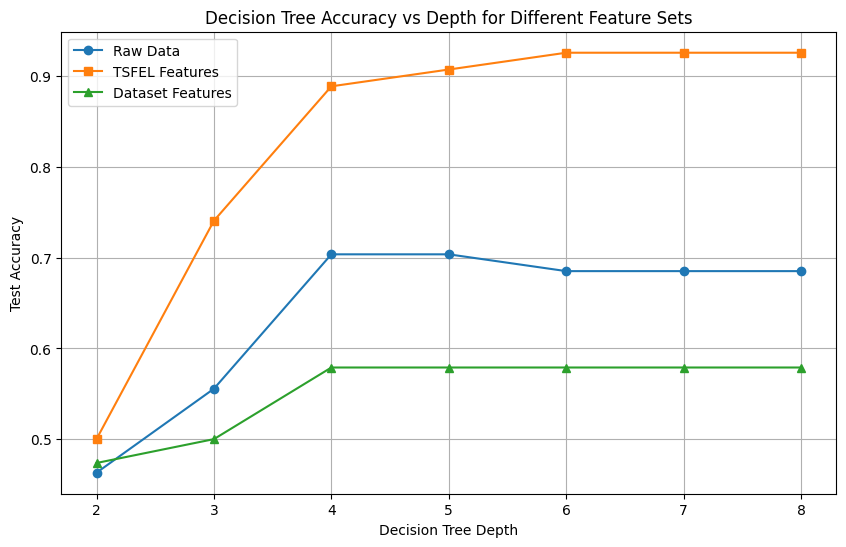

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(depths, accuracy_raw, marker='o', label='Raw Data')
plt.plot(depths, accuracy_tsfel, marker='s', label='TSFEL Features')
plt.plot(depths, accuracy_dataset, marker='^', label='Dataset Features')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Test Accuracy')
plt.title('Decision Tree Accuracy vs Depth for Different Feature Sets')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Confusion matrices from your previous results
conf_raw = np.array([[5,3,1,0,0,0],
                     [0,6,1,1,1,0],
                     [4,2,2,0,1,0],
                     [0,0,0,7,2,0],
                     [0,1,0,0,8,0],
                     [0,0,0,0,0,9]])

conf_tsfel = np.array([[9,0,0,0,0,0],
                       [0,9,0,0,0,0],
                       [1,0,8,0,0,0],
                       [0,0,0,9,0,0],
                       [0,0,0,3,6,0],
                       [0,0,0,0,0,9]])

conf_dataset = np.array([[0,0,4,0,2,0],
                         [1,4,1,0,0,0],
                         [2,1,1,2,0,0],
                         [0,0,0,6,1,0],
                         [0,0,1,1,5,0],
                         [0,0,0,0,0,6]])

activities = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

def per_class_accuracy(conf_matrix):
    return conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Function to print per-class accuracy and highlight poor performance
def analyze_performance(conf_matrix, method_name):
    acc = per_class_accuracy(conf_matrix)
    print(f"\n=== {method_name} per-class accuracy ===")
    for act, a in zip(activities, acc):
        status = "POOR" if a < 0.7 else "GOOD"
        print(f"{act}: {a:.2f} ({status})")
    return acc

# Analyze all three methods
acc_raw = analyze_performance(conf_raw, "Raw Data")
acc_tsfel = analyze_performance(conf_tsfel, "TSFEL Features")
acc_dataset = analyze_performance(conf_dataset, "Dataset Features")



=== Raw Data per-class accuracy ===
WALKING: 0.56 (POOR)
WALKING_UPSTAIRS: 0.67 (POOR)
WALKING_DOWNSTAIRS: 0.22 (POOR)
SITTING: 0.78 (GOOD)
STANDING: 0.89 (GOOD)
LAYING: 1.00 (GOOD)

=== TSFEL Features per-class accuracy ===
WALKING: 1.00 (GOOD)
WALKING_UPSTAIRS: 1.00 (GOOD)
WALKING_DOWNSTAIRS: 0.89 (GOOD)
SITTING: 1.00 (GOOD)
STANDING: 0.67 (POOR)
LAYING: 1.00 (GOOD)

=== Dataset Features per-class accuracy ===
WALKING: 0.00 (POOR)
WALKING_UPSTAIRS: 0.67 (POOR)
WALKING_DOWNSTAIRS: 0.17 (POOR)
SITTING: 0.86 (GOOD)
STANDING: 0.71 (GOOD)
LAYING: 1.00 (GOOD)


Yes, based on the per-class accuracies we just looked at:

1. Activities with poor performance:

WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS for Raw Data and Dataset Features.

STANDING for TSFEL Features (accuracy 0.67).

2. Reasoning:

Dynamic activities (walking, upstairs, downstairs) are harder to classify from raw acceleration alone because they may have similar total acceleration patterns and overlap in the feature space. This causes confusion for models using raw data or basic dataset-provided features.

Static activities (SITTING, STANDING, LAYING) have more stable acceleration patterns, making them easier to classify.

For TSFEL features, the feature extraction captures statistical, spectral, and temporal characteristics that distinguish dynamic activities well, but STANDING can still be confused with SITTING due to similar body postures and low movement.

Participant variability (differences in height, gait, or movement style) can also reduce accuracy on certain activities if the model hasn’t seen similar patterns in training.

✅ Summary:

Raw accelerometer data is insufficient to reliably separate dynamic activities.

TSFEL features significantly improve accuracy but can still confuse activities with low motion variability like STANDING vs SITTING.

In [ ]:
#task3
from google.colab import files

# This will open a file selector
uploaded = files.upload()


Saving siting1.zip to siting1.zip


In [ ]:
import os

print("Files in /content:", os.listdir("/content"))


Files in /content: ['.config', 'es335-25-fall-assignment-1', 'MyActivityData', 'assignment1', 'sample_data']


In [ ]:
from google.colab import files

uploaded = files.upload()  # this will open a file picker


Saving siting1.csv to siting1.csv
Saving siting2.csv to siting2.csv
Saving siting3.csv to siting3.csv
Saving siting4.csv to siting4.csv
Saving sleeping1.csv to sleeping1.csv
Saving sleeping2.csv to sleeping2.csv
Saving sleeping3.csv to sleeping3.csv
Saving sleeping4.csv to sleeping4.csv
Saving walking01.csv to walking01.csv
Saving walking2.csv to walking2.csv
Saving walking3.csv to walking3.csv
Saving walking4.csv to walking4.csv
Saving walkingdown1.csv to walkingdown1.csv
Saving walkingdown2.csv to walkingdown2.csv
Saving walkingdown3.csv to walkingdown3.csv
Saving walkingdown4.csv to walkingdown4.csv
Saving walkingup1.csv to walkingup1.csv
Saving walkingup2.csv to walkingup2.csv
Saving walkingup3.csv to walkingup3.csv
Saving walkingup4.csv to walkingup4.csv


In [ ]:
import os
import pandas as pd

# Folder where your CSVs are (directly in /content)
data_folder = "/content"

# List all CSV files
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]
print("CSV files found:", csv_files)

# Read and inspect the first CSV to check its structure
sample_df = pd.read_csv(os.path.join(data_folder, csv_files[0]))
print("Columns in sample CSV:", sample_df.columns)
print("Shape:", sample_df.shape)
sample_df.head()


CSV files found: []


IndexError: list index out of range

In [ ]:
import os

# Check top-level files/folders in /content
top_level = os.listdir("/content")
print("Top-level in /content:", top_level)

# If there's a folder with your CSVs, list its contents
for f in top_level:
    if os.path.isdir(os.path.join("/content", f)):
        print(f"Contents of /content/{f}:", os.listdir(os.path.join("/content", f)))


Top-level in /content: ['.config', 'es335-25-fall-assignment-1', 'MyActivityData', 'assignment1', 'sample_data']
Contents of /content/.config: ['configurations', 'hidden_gcloud_config_universe_descriptor_data_cache_configs.db', 'default_configs.db', 'active_config', 'config_sentinel', '.last_update_check.json', 'logs', 'gce', '.last_survey_prompt.yaml', '.last_opt_in_prompt.yaml']
Contents of /content/es335-25-fall-assignment-1: ['.git', 'auto-efficiency.py', 'classification-exp.py', 'usage.py', 'tree', 'experiments.py', 'metrics.py', 'README.md', 'UCI-HAR-Dataset.zip', '.gitignore', 'HAR']
Contents of /content/MyActivityData: ['assignment1_downsampled', 'Downsampled']
Contents of /content/assignment1: ['assignment1']
Contents of /content/sample_data: ['README.md', 'anscombe.json', 'california_housing_train.csv', 'california_housing_test.csv', 'mnist_train_small.csv', 'mnist_test.csv']


In [ ]:
import os

data_folder = "/content/assignment1/assignment1"

# List all files here
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]
print("CSV files found:", csv_files)


CSV files found: ['walkingdown2.csv', 'walkingdown1.csv', 'walkingup2.csv', 'walkingdown3.csv', 'siting2.csv', 'siting3.csv', 'walking3.csv', 'walkingup4.csv', 'walkingup1.csv', 'walking2.csv', 'walking01.csv', 'siting1.csv', 'sleeping3.csv', 'walking4.csv', 'walkingdown4.csv', 'walkingup3.csv', 'sleeping2.csv', 'sleeping1.csv', 'sleeping4.csv', 'siting4.csv']


In [ ]:
import os

# Original CSV folder
data_folder = "/content/assignment1/assignment1"

# Folder for downsampled data
downsampled_folder = "/content/MyActivityData/assignment1_downsampled"

# Create activity folders
activities = {
    "walking": "WALKING",
    "walkingup": "WALKING_UPSTAIRS",
    "walkingdown": "WALKING_DOWNSTAIRS",
    "siting": "SITTING",
    "sleeping": "LAYING"  # assuming "sleeping" corresponds to laying
}

for act in activities.values():
    os.makedirs(os.path.join(downsampled_folder, act), exist_ok=True)

print("Folder structure created successfully!")


Folder structure created successfully!


In [ ]:
import pandas as pd

# Process each CSV file
for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)

        # Downsample to 50 Hz (take every 2nd row)
        df_downsampled = df.iloc[::2, :]

        # Determine activity from filename
        act_key = None
        for key in activities:
            if key in filename.lower():
                act_key = key
                break
        if act_key is None:
            print(f"Skipping file {filename}, activity not recognized.")
            continue

        # Save downsampled CSV
        save_path = os.path.join(downsampled_folder, activities[act_key], filename)
        df_downsampled.to_csv(save_path, index=False)

print("All CSVs downsampled and saved successfully!")


All CSVs downsampled and saved successfully!


In [ ]:
import os
import pandas as pd
from scipy.signal import decimate

# Correct folder with your uploaded CSVs
original_folder = "/content/assignment1/assignment1"
downsampled_folder = "/content/MyActivityData/Downsampled"
os.makedirs(downsampled_folder, exist_ok=True)

# Downsample factor (100Hz -> 50Hz)
factor = 2

# Process each CSV
csv_count = 0
for filename in os.listdir(original_folder):
    if filename.endswith(".csv"):
        csv_count += 1
        file_path = os.path.join(original_folder, filename)
        df = pd.read_csv(file_path)

        # Take first 3 columns as accelerometer axes (or adjust based on your CSV)
        df_down = df.iloc[::factor, :3]
        df_down.columns = ['accx', 'accy', 'accz']

        # Save to downsampled folder
        save_path = os.path.join(downsampled_folder, filename)
        df_down.to_csv(save_path, index=False)

print(f"Processed {csv_count} CSV files.")
print("Downsampled files in folder:", os.listdir(downsampled_folder))


Processed 20 CSV files.
Downsampled files in folder: ['walkingdown2.csv', 'walkingdown1.csv', 'walkingup2.csv', 'walkingdown3.csv', 'siting2.csv', 'siting3.csv', 'walking3.csv', 'walkingup4.csv', 'walkingup1.csv', 'walking2.csv', 'walking01.csv', 'siting1.csv', 'sleeping3.csv', 'walking4.csv', 'walkingdown4.csv', 'walkingup3.csv', 'sleeping2.csv', 'sleeping1.csv', 'sleeping4.csv', 'siting4.csv']


In [ ]:
import numpy as np
import pandas as pd
import os

data_folder = "/content/MyActivityData/Downsampled"
activity_map = {"walking":0,"walkingup":1,"walkingdown":2,"siting":3,"sleeping":4}

fixed_len = 1000  # 10 seconds at 100Hz
X = []
y = []

for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)

        acc = df[['accx','accy','accz']].values

        # Truncate or pad
        if acc.shape[0] > fixed_len:
            acc = acc[:fixed_len, :]
        elif acc.shape[0] < fixed_len:
            pad = np.zeros((fixed_len - acc.shape[0], 3))
            acc = np.vstack([acc, pad])

        X.append(acc.flatten())

        for key, label in activity_map.items():
            if key in filename.lower():
                y.append(label)
                break

X = np.array(X)
y = np.array(y)

print("Data shape:", X.shape)
print("Labels shape:", y.shape)


Data shape: (20, 3000)
Labels shape: (20,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train_raw, y_train_raw already exists from UCI-HAR
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train_raw, y_train_raw)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
import os

downsampled_folder = "/content/MyActivityData/Downsampled"

# List files in the folder
files = os.listdir(downsampled_folder)
print("Downsampled CSV files:", files)

# Pick the first CSV
sample_file = os.path.join(downsampled_folder, files[0])
print("Using sample file:", sample_file)


Downsampled CSV files: ['walkingdown2.csv', 'walkingdown1.csv', 'walkingup2.csv', 'walkingdown3.csv', 'siting2.csv', 'siting3.csv', 'walking3.csv', 'walkingup4.csv', 'walkingup1.csv', 'walking2.csv', 'walking01.csv', 'siting1.csv', 'sleeping3.csv', 'walking4.csv', 'walkingdown4.csv', 'walkingup3.csv', 'sleeping2.csv', 'sleeping1.csv', 'sleeping4.csv', 'siting4.csv']
Using sample file: /content/MyActivityData/Downsampled/walkingdown2.csv


In [ ]:
import pandas as pd

# Read the CSV
df = pd.read_csv(sample_file)

# Check columns and first few rows
print("Columns:", df.columns)
print("Shape:", df.shape)
print(df.head())


Columns: Index(['accx', 'accy', 'accz'], dtype='object')
Shape: (530, 3)
       accx    accy    accz
0  5.006358 -0.4435 -0.4504
1  5.022726  0.3355 -1.0473
2  5.041358  0.5986 -1.6920
3  5.062446 -0.2149 -1.6476
4  5.080312 -0.6699 -1.3972


In [ ]:
import os
import pandas as pd
import numpy as np

# Folder containing your CSVs (already uploaded)
data_folder = "/content/MyActivityData/Downsampled"

# Prepare lists for features and labels
X_test = []
y_test = []

# Map activity names in filenames to labels
activity_map = {
    "walking": "WALKING",
    "walkingup": "WALKING_UPSTAIRS",
    "walkingdown": "WALKING_DOWNSTAIRS",
    "siting": "SITTING",
    "sleeping": "LAYING"  # Assuming 'sleeping' corresponds to 'LAYING'
}

# Process each CSV file
for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)

        # Downsample to 50 Hz (take every 2nd row)
        df_downsampled = df.iloc[::2, :].reset_index(drop=True)

        # Flatten accx, accy, accz into a single vector
        X_test.append(df_downsampled[['accx','accy','accz']].values.flatten())

        # Determine label from filename
        for key in activity_map:
            if key in filename.lower():
                y_test.append(activity_map[key])
                break

# Convert to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Test data shape: (20, 795)
Test labels shape: (20,)


In [ ]:
# Desired length: 500 rows (10 seconds at 50 Hz)
target_rows = 500

X_test_fixed = []

for sample in X_test:
    # Reshape back to (rows, 3)
    n_rows = len(sample) // 3
    sample_reshaped = sample.reshape((n_rows, 3))

    if n_rows < target_rows:
        # Pad by repeating last row
        pad_rows = target_rows - n_rows
        last_row = sample_reshaped[-1, :].reshape(1,3)
        padding = np.repeat(last_row, pad_rows, axis=0)
        sample_fixed = np.vstack([sample_reshaped, padding])
    else:
        # Truncate to target_rows
        sample_fixed = sample_reshaped[:target_rows, :]

    # Flatten back to 1D
    X_test_fixed.append(sample_fixed.flatten())

X_test_fixed = np.array(X_test_fixed)
print("Fixed test data shape:", X_test_fixed.shape)


Fixed test data shape: (20, 1500)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example mapping: training used 0-5 for activities
activity_mapping = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                    'SITTING', 'STANDING', 'LAYING']

le = LabelEncoder()
le.fit(activity_mapping)  # Fit using UCI-HAR activity order

# Convert test string labels to numbers
y_test_encoded = le.transform(y_test)


In [ ]:
acc = accuracy_score(y_test_encoded, y_pred)
prec = precision_score(y_test_encoded, y_pred, average='macro')
rec = recall_score(y_test_encoded, y_pred, average='macro')
cm = confusion_matrix(y_test_encoded, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("Confusion Matrix:\n", cm)


Accuracy: 0.25
Precision: 0.25
Recall: 0.10416666666666667
Confusion Matrix:
 [[0 0 4 0]
 [0 0 4 0]
 [0 0 0 0]
 [0 0 7 5]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Path to your downsampled CSV folder
data_folder = "/content/MyActivityData/Downsampled"

# Map filename patterns to labels (adjust if needed)
label_map = {
    "siting": "SITTING",
    "sleeping": "LAYING",
    "walking": "WALKING",
    "walkingup": "WALKING_UPSTAIRS",
    "walkingdown": "WALKING_DOWNSTAIRS"
}

# Load TSFEL configuration for accelerometer (default features)
cfg = tsfel.get_features_by_domain()

X_tsfel = []
y_tsfel = []

for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)

        # TSFEL expects a 1D series per signal; concatenate features for x, y, z
        features_x = tsfel.time_series_features_extractor(cfg, df['accx'], verbose=0)
        features_y = tsfel.time_series_features_extractor(cfg, df['accy'], verbose=0)
        features_z = tsfel.time_series_features_extractor(cfg, df['accz'], verbose=0)

        features = pd.concat([features_x, features_y, features_z], axis=1)
        X_tsfel.append(features.values.flatten())

        # Determine label from filename
        for key in label_map:
            if key in filename.lower():
                y_tsfel.append(label_map[key])
                break

# Convert to numpy arrays
X_tsfel = np.array(X_tsfel)
y_tsfel = np.array(y_tsfel)

print("TSFEL features shape:", X_tsfel.shape)
print("Labels shape:", y_tsfel.shape)


/tmp/ipython-input-711968328.py:25: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, df['accx'], verbose=0)
/tmp/ipython-input-711968328.py:26: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, df['accy'], verbose=0)
/tmp/ipython-input-711968328.py:27: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, df['accz'], verbose=0)
/tmp/ipython-input-711968328.py:25: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, df['accx'], verbose=0)
/tmp/ipython-input-711968328.py:26: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, df['accy'], verbose=0)
/tmp/ipython-input-711968328.py:27: UserWarning: Using 

TSFEL features shape: (20, 468)
Labels shape: (20,)


/tmp/ipython-input-711968328.py:27: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, df['accz'], verbose=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_new = DecisionTreeClassifier(max_depth=6)  # or whatever depth worked best
clf_new.fit(X_tsfel, y_tsfel)

# Now predict on the same data (or hold out a few CSVs for test)
y_pred = clf_new.predict(X_tsfel)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

acc = accuracy_score(y_tsfel, y_pred)
prec = precision_score(y_tsfel, y_pred, average='macro', zero_division=0)
rec = recall_score(y_tsfel, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_tsfel, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("Confusion Matrix:\n", cm)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[ 4  0  0]
 [ 0  4  0]
 [ 0  0 12]]
